In [9]:
from numpy import *
import matplotlib.pyplot as plt
from IPython.display import HTML, display
from matplotlib import animation
import scipy.sparse as sp
import warnings

%matplotlib inline
plt.rcParams['animation.html'] = 'html5'
warnings.filterwarnings('ignore')


####################CONST####################
hbar = 1.05E-34
m = 9.11E-31    # elektronmasse
V0 = 1.6E-19
Ntot = 1000     # Intervallbredde
N = 100         # Parabolbredde
dx = 1.0E-10    # 1Å
harmonic = True
##############################################

#################VARIABLE#####################
sigma = N / 4 * dx
p0 = 3E-25
k0 = p0 / hbar
omega = sqrt(k0 / m)
meanE = p0 ** 2 / (2 * m)
alpha = 1 / (2 * sigma ** 2)
##############################################

def V(x):
    if not harmonic:         # Fri partikkel
        return zeros_like(x)
    else:                    # Harmonisk
        V = V0 * ((x - x0) / (N * dx)) ** 2  # N=x/dx
        mask = ((x0 - N * dx) < x) & (x < (x0 + N * dx))
        return where(mask, V, V0)
    
def animator(time=200,figsize=(14,4)):
    def init():
        line.set_data([], [])
        marker1.set_data([], [])
        marker2.set_data([], [])
        marker3.set_data([], [])
        return line, marker1, marker2, marker3,

    def animate(i):
        t = tArr[i]
        line.set_data(x, BigPsiSquared(t))
        marker1.set_data(meanX(t) + sigmaX(t), 0)
        marker2.set_data(meanX(t) - sigmaX(t), 0)
        marker3.set_data(meanX(t), 0)
        return line, marker1, marker2, marker3,

    tArr = arange(time) * 3E-15

    fig = plt.figure(figsize=figsize)
    ymax = 1.7E8 
    ax = plt.axes(xlim=(0, Ntot * dx), ylim=(0, ymax))
    line, = ax.plot([], [], lw=1,label=r'$\left| \Psi \right|^2$')
    marker1, = ax.plot([], [], 'bo',label=r'$\Delta x_t$')
    marker2, = ax.plot([], [], 'bo')
    marker3, = ax.plot([], [], 'co',label=r'$\langle x \rangle_t$')
    plt.xlabel('$x$ (m)')

    if harmonic:
        plt.xlim(0.3E-7,0.7E-7)
        b0 = x[abs(V(x) * 10 ** 27 - ones_like(x) * meanE * 10 ** 27) < 0.005E8]
        print(b0)
        
        plt.plot(x, ones_like(x) * meanE * 10 ** 27,label='$E=p_0^2/2m$')
        plt.plot(x, V(x) * 10 ** 27,label='$V$')
        plt.plot(x0, 0, 'ko', label='$x_0$')
        plt.plot(b0, zeros_like(b0), 'ro',label='$b_0$')
    
    plt.legend(loc='upper left', borderaxespad=1.5,borderpad=0.1)
    anim=animation.FuncAnimation(fig, animate, init_func=init, repeat=True, frames=len(tArr), interval=64, blit=True)
    plt.close(fig)
    display(HTML(anim.to_html5_video()))


# Innledning
Et grunnleggende postulat i kvantemekanikken sier at tilstanden til et system er fullstendig beskrevet av systemets bølgefunksjon $\Psi$, hvis løsning kommer av Schrödingerlikningen 
\begin{equation}\label{eq:SL}
    i\hbar\frac{\partial\Psi}{\partial t}=\hat{H}\Psi
\end{equation}
hvor $\hat{H}=-\frac{\hbar^2}{2m}\nabla^2+V$ er systemets Hamiltonoperator. 

Ved Bornes sannsynlighetstolkning vil en kvantemekanisk partikkel kunne beskrives i henhold til en sannsynlighetsfordeling gitt ved $\left|\Psi\right|^2$.
For tidsuavhengige potensialer $V=V(\vec{r})$ vil \eqref{eq:SL} kunne løses ved seperasjon av variable, slik at bølgefunksjonen blir på formen 
\begin{equation}\label{eq:Psi}
    \Psi(\vec{r},t)=\psi(\vec{r})e^{-iEt/\hbar}
\end{equation}
der $\psi$ er løsningen av den tidsuavhengige Schrödingerlikningen
\begin{equation}
    \label{eq:TUSL}
    \hat{H}\psi=E\psi
\end{equation}
Dette er en egenverdilikning som kvantiserer systemets tilstander i et fullstendig egenfunksjonsett $\{ \psi_j \}$  med tilhørende spekter $\{ E_j \}$. Vi skal utelukkende studere éndimensjonale potensialer som resulterer i diskrete utgaver av nevnte mengder. Bølgefunksjonen \eqref{eq:Psi} beskriver en stasjonær tilstand der sannsynlighetsfordelingen ikke avhenger av tiden. 
Siden $\hat{H}$ er en hermitesk operator vil $\{ \psi_j \}$ danne en ortogonal basis for Hilbertrommet $\mathcal{H}$, slik at \begin{equation}\label{eq:psiDotpsi}
    \langle \psi_i,\psi_j \rangle=\int{\psi_i^* \psi_j} \space dx=\delta_{ij}
\end{equation}
for normerte $\psi$. Dette innebærer videre at en generell bølgefunksjon $\Psi \in \mathcal{H}$ kan utvikles som 

\begin{equation}\label{eq:expansion}
    \Psi=\sum_{j} c_j \psi_j e^{-iE_jt/\hbar}
\end{equation}
med resulterende tidsavhengig sannsynlighetsfordeling.   
Utviklingskoeffisientene finnes ved

\begin{equation}\label{eq:expansionCoeff}
    c_j=\langle \psi_j,\Psi(x,0) \rangle
\end{equation}
  
og resulterer i $\langle \Psi,\Psi \rangle=\sum_j \left| c_j \right|^2=1 \space \forall t \space$ når $\{ \psi_j \}$ er ortonormale. 

I denne øvingen ser vi nærmere på tidsutviklingen til bølgepakken hvis starttilstand
\begin{equation}\label{eq:Gaussian} 
    \Psi(x,0)=(2\pi\sigma^2)^{-1/4}e^{-x^2/4\sigma^2}e^{ip_0x/\hbar}
\end{equation}

er en overlagring av de-Broglie-bølger som beskriver sannsynlighetsfordelingen rundt en tilnærmet lokalisert partikkel. Vi skal visualisere $\left | \Psi \right|^2$ i henholdsvis et harmonisk- og konstant potensiale 

\begin{equation}
  \label{eq:potensial} 
  V(x) =
  \begin{cases}
  0 & \text{Fri partikkel} \\
  V_0(x-x_0)^2 & \text{Harmonisk partikkel} \\
  \end{cases}
\end{equation}


ved å numerisk bestemme egenfunksjonene som oppfyller likning \eqref{eq:TUSL}, og siden utvikle $\Psi$ i henhold til \eqref{eq:expansion}. Med denne representasjonen kan forventningsverdien av en observerbar størrelse $F$ beregnes som 
\begin{equation}\label{eq:expectation}
    \langle F \rangle=\int\Psi^{*}\hat{F} \space \Psi \space dx
\end{equation}
for enhvert tid. 


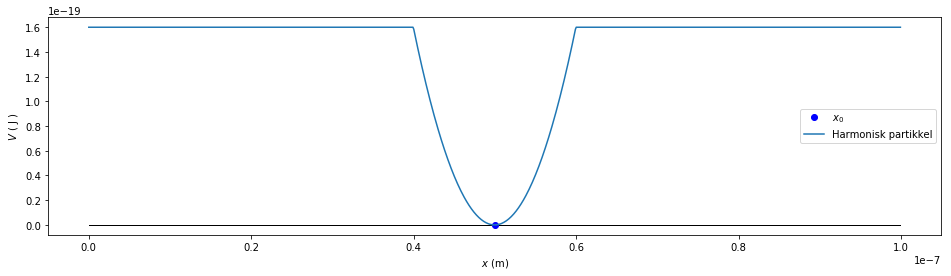

In [10]:
x = arange(Ntot) * dx
x0 = x[len(x) // 2] if len(x) % 2 != 0 else (x[len(x) // 2 - 1] + x[len(x) // 2]) * (1 / 2)
x=x.reshape((Ntot,1))

plt.figure(figsize=(16,4))
plt.plot(x, zeros_like(x), color='k',lw=1)
plt.plot(x0, 0, 'bo', label='$x_0$')
plt.plot(x, V(x), label='Harmonisk partikkel')
plt.legend(loc='best')
plt.xlabel('$x$ (m)')
plt.ylabel('$V$ ( J )')
plt.show()

# Numerisk tilnærming

Rammene for oppgaven legges ved å diskretisere x-aksen i $N_{tot}$ punkter med innbyrdes avstand $\Delta x$. Vi lar $x_0$ betegne midtpunktet på x-aksen. Sentrert rundt $x_0$ oppretter vi et område av bredde $N$ hvor det harmoniske potensialet i likning \eqref[eq:potential]} er definert. For resten av det diskretiserte området defineres $V(x)=V_0$ når potensialet er harmonisk, og ellers lar vi hele det diskretiserte området ha $V(x)=0$ når vi betrakter en fri partikkel. Utenfor det diskretiserte området antar vi $V(x)=\infty$ slik at bølgefunksjonen følgelig må gå mot null ved endepunktene. Ved å tilnærme  $\psi^{\prime \prime}$ med sentraldifferanser kan \eqref{eq:TUSL} modelleres ved 
\begin{equation}\label{eq:NumTUSL}
   \mathbb{H}\vec{\psi}=E\vec{\psi}
\end{equation}

der den tridiagonale matrisen $\mathbb{H}\in \mathbb{R}^{N_{tot} \times N_{tot}}$ har elementer

\begin{equation}
  \label{eq:matrixElem} 
  \begin{cases}
  \mathbb{H}_{nn}&= \frac{\hbar^2}{m(\Delta x)^2}+V(x_n) \\
  \mathbb{H}_{n,n\pm1}&= -\frac{\hbar^2}{2m(\Delta x)^2} \\
  \end{cases}
\end{equation}

og $\vec{\psi}\in \mathbb{R}^{N_{tot}\times 1}$ er en egenvektor som svarer til egenfunksjonen $\psi$ evaluert for den diskretiserte x-aksen $x_n=n\Delta x \;\;\;\;  n=1,..,N_{tot}$. 

Ved å bruke ``` np.linalg.eigh(``` $\mathbb{H}$ ```)``` fås $N_{tot}$ egenvektorer $\vec{\psi}^{(j)}$ med tilhørende egenverdier $E_j$ som tilfredsstiller likning \eqref{eq:NumTUSL}. Normeringen gjøres analogt til likning \eqref{eq:psiDotpsi} ved 

\begin{equation}\label{eq:psiDotpsiNum}
    \sum_{n=1}^{N_{tot}} \left| \space \psi_n^{(j)} \right|^2 \Delta x =1 \;\;\;\;  j=1,..,N_{tot}
\end{equation}

der summen går over komponentene av den aktuelle egenvektoren.
Vektorene tilsvarer med dette egenfunksjonsettet fra likning \eqref{eq:TUSL}, og kan dermed brukes til å utvikle starttilstanden \eqref{eq:Gaussian} i henhold til likning \eqref{eq:expansion} gitt at likning \eqref{eq:expansionCoeff} tilnærmes ved 
\begin{equation}\label{eq:NumExpansionCoeff}
    c^{(j)}=\sum_{n=1}^{N_{tot}} \psi_n^{(j)*} \Psi(x_n,0)\Delta x  \;\;\;\;  j=1,..,N_{tot}
\end{equation}



In [11]:
def getBigPsiSquared(p0=p0, sigma=sigma, harmonic=harmonic):
    k0 = p0 / hbar
    omega = sqrt(k0 / m)
    meanE = p0 ** 2 / (2 * m)
    alpha = 1 / (2 * sigma ** 2)
    globals().update(p0=p0, sigma=sigma, harmonic=harmonic, k0=k0, omega=omega, meanE=meanE, alpha=alpha)

    subsupDiag = -ones(Ntot - 1) * hbar ** 2 / (2 * m * dx ** 2)
    diagon = ones(Ntot) * hbar ** 2 / (m * dx ** 2) + V(x.T)
    H = array([diagon, subsupDiag, subsupDiag]); offsets = array([0, -1, 1])
    H = sp.diags(H, offsets, shape=(Ntot, Ntot))
    E, Psi = linalg.eigh(H.todense())  
    E, Psi = asarray(E).reshape(Ntot, 1), asarray(Psi, dtype=complex128)
    quadPsi = linalg.norm(Psi, 2, 0) ** 2 * dx
    normFactor = quadPsi[0]  
    Psi /= sqrt(normFactor)  
    PsiConj = conj(Psi)

    coefficient = (2 * pi * sigma ** 2) ** (-0.25)
    envelope = exp(-(x - x0) ** 2 / (4 * sigma ** 2))
    planewave = exp(1j * k0 * x)
    Psi0 = (coefficient * envelope * planewave)
    c = (PsiConj.T @ Psi0 * dx)

    BigPsi = lambda t: Psi @ (c * (exp(-1j * E * t / hbar)))
    BigPsiSquared = lambda t: abs(BigPsi(t)) ** 2  
    return BigPsiSquared

meanX=lambda t: (x.T)@BigPsiSquared(t)*dx
meanX2=lambda t: (x.T)**2@BigPsiSquared(t)*dx
sigmaX=lambda t: sqrt(meanX2(t)-meanX(t)**2)
analyticSigmaX=lambda t: sqrt(sigma**2+hbar**2*t**2/(4*m**2*sigma**2))
meanP= lambda t: (p0 + 1j * hbar * alpha * x.T)@BigPsiSquared(t)*dx
#meanP2= lambda t: ((p0 + 1j * hbar * alpha * x.T) ** 2 + hbar ** 2 * alpha)@BigPsiSquared(t)*dx
meanP2= lambda t: ((p0 + 1j * hbar * alpha * x.T) ** 2 + hbar ** 2 * alpha)@BigPsiSquared(t)*dx
sigmaP=lambda t: sqrt(meanP2(t)-meanP(t)**2)
heisenProd=lambda t: sigmaP(t)*sigmaX(t)

# Oppgaver

Vi ønsker 




Fri partikkel: (N=100, sigma=N/4)
* fordeling har praktisk talt analytisk usikkerhet i posisjon for 1E-12
* litt "frysninger" som kommer når numerisk usikkerhet overstiger analytisk usikkerhet
* Usikkerheten i pos minker når partikkelen treffer veggene. Dette som gir periodiske dupp i numerisk sigma x. Bredden på dupp henger sammen med bredden på fordeling. Jo bredere/flatere fordeling, jo større dupp over lengre tid ettersom fordelingen bruker lengre tid ved veggen og i større grad presses sammen ved veggen ()

* Rimelig god overenstemmelse for 1E-21, fordeling flater ut under traversering, ingen "frysninger" og numerisk usikkerhet overstiger ikke analytisk usikkerhet
* Grad av utflatning reflekteres i hvor fort usikkerheten i posisjon stiger. 
* sigma x stiger raskere for mindre initiell sigma

* for fiksert p0 vil en større initiell sigma gi bedre tilnærmelse mellom numerisk og analytisk usikkerhet under traversering, men større avvik når partikkelen  treffer veggen siden "duppene" blir større. Fordelingen synker mindre sammen for større initiell sigma. 

* hvordan svarer flere verdier av p0 til riktige uttrykk for sigma x

* for fiksert 


harmonisk potensiale: (N=100, sigma=N/4)
* tyngepunktet varierer harmonisk
* når sigma p minker så øker sigma x og omvendt
* sannsynlighetsfordelingen "slarker minst" når sigmaene varierer stabilt slik at heisenprod er periodisk 
* for en verdi av p0=3.6E-25 slik at usikkerhetene slår hverandre ut (og konvergerer til hbar/2) slarker fortsatt sannsynlighetsfordelingen endel. 



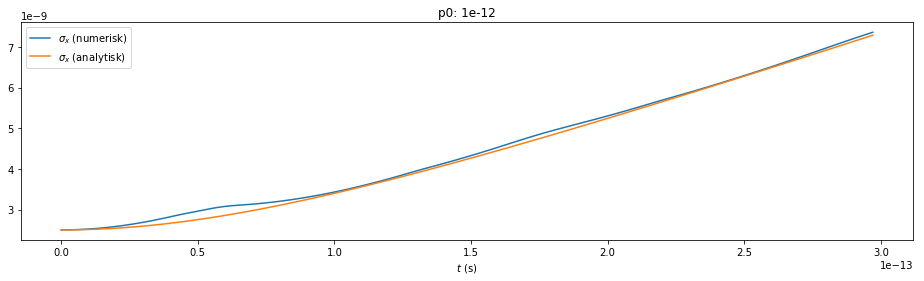

In [12]:
BigPsiSquared = getBigPsiSquared(p0=1E-12,harmonic=False)

tArr=arange(100)*3E-15
plt.figure(figsize=(16,4))
plt.title('p0: '+str(p0))
plt.plot(tArr,sigmaX(tArr).reshape(tArr.shape), label='$\sigma_{x}$ (numerisk)')
plt.plot(tArr,analyticSigmaX(tArr).reshape(tArr.shape), label='$\sigma_{x}$ (analytisk)')
plt.legend(loc='best')
plt.xlabel('$t$ (s)')
plt.show()

animator();

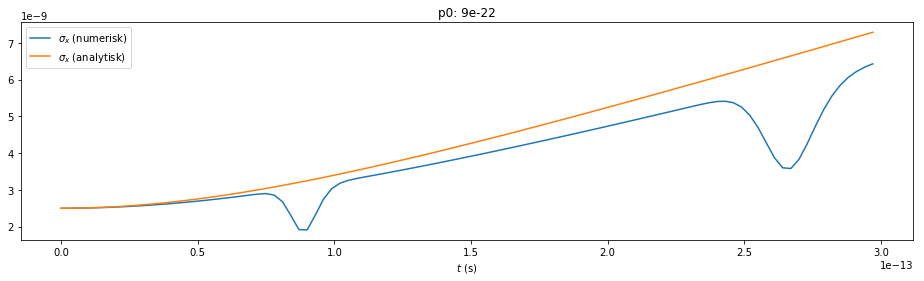

In [13]:
BigPsiSquared = getBigPsiSquared(p0=0.9E-21,harmonic=False)

tArr=arange(100)*3E-15
plt.figure(figsize=(16,4))
plt.title('p0: '+str(p0))
plt.plot(tArr,sigmaX(tArr).reshape(tArr.shape),label='$\sigma_{x}$ (numerisk)')
plt.plot(tArr,analyticSigmaX(tArr).reshape(tArr.shape), label='$\sigma_{x}$ (analytisk)')
plt.legend(loc='best')
plt.xlabel('$t$ (s)')
plt.show()

animator();

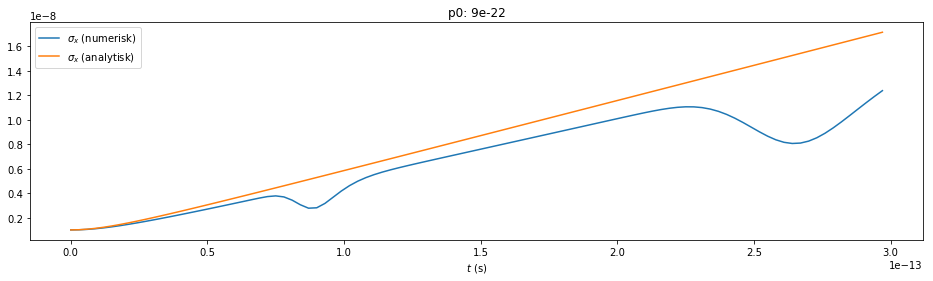

In [14]:
BigPsiSquared = getBigPsiSquared(p0=0.9E-21,sigma = N / 10 * dx,harmonic=False)

tArr=arange(100)*3E-15
plt.figure(figsize=(16,4))
plt.title('p0: '+str(p0))
plt.plot(tArr,sigmaX(tArr).reshape(tArr.shape),label='$\sigma_{x}$ (numerisk)')
plt.plot(tArr,analyticSigmaX(tArr).reshape(tArr.shape), label='$\sigma_{x}$ (analytisk)')
plt.legend(loc='best')
plt.xlabel('$t$ (s)')
plt.show()

animator();

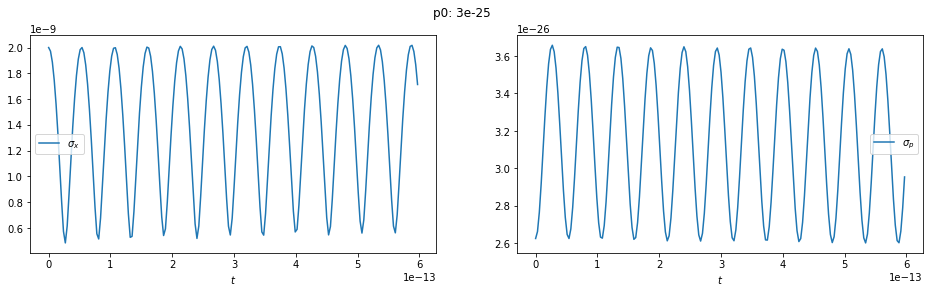

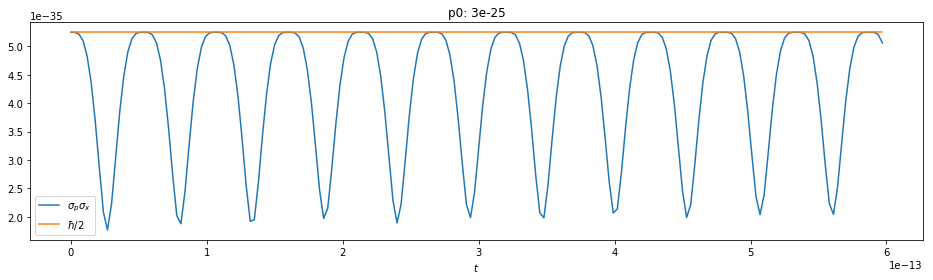

[  4.44000000e-08   5.55000000e-08]


In [ ]:
BigPsiSquared = getBigPsiSquared(p0=3E-25,sigma = N / 5 * dx, harmonic=True)

tArr=arange(200)*3E-15

fig, axArr =plt.subplots(1, 2, sharex=True,figsize=(16,4))

plt.suptitle('p0: '+str(p0))

axArr[0].plot(tArr,sigmaX(tArr).reshape(tArr.shape),label='$\sigma_{x}$')
axArr[0].legend(loc='best')
axArr[0].set_xlabel('$t$')
axArr[1].plot(tArr,sigmaP(tArr).reshape(tArr.shape), label='$\sigma_p$')
axArr[1].legend(loc='best')
axArr[1].set_xlabel('$t$')

plt.figure(figsize=(16,4))
plt.title('p0: '+str(p0))
plt.plot(tArr,heisenProd(tArr).reshape(tArr.shape), label='$\sigma_p\sigma_x$')
plt.plot(tArr,ones_like(tArr)*hbar/2, label="$\hbar/2$")
plt.legend(loc='best')
plt.xlabel("$t$")
plt.show()

animator()

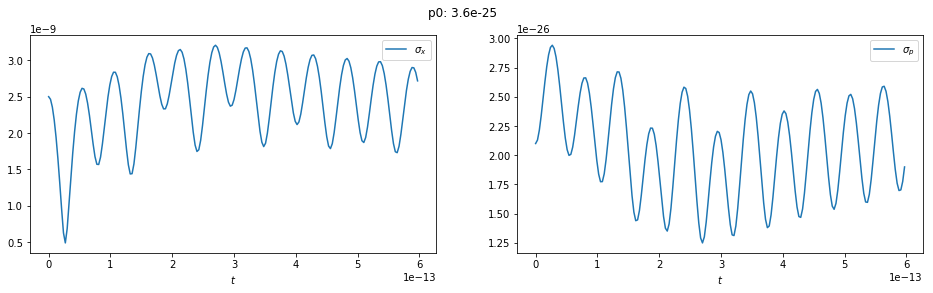

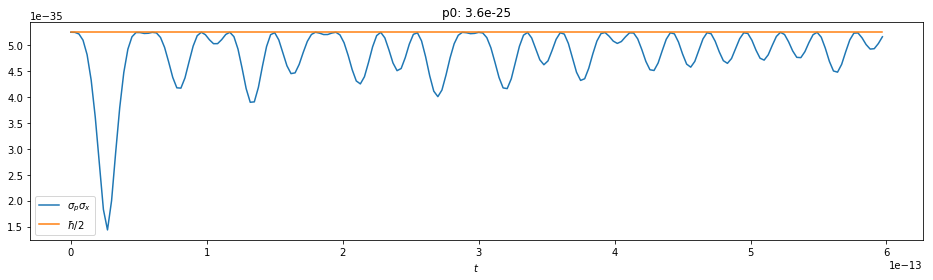

[  4.33000000e-08   5.66000000e-08]


In [ ]:
BigPsiSquared =getBigPsiSquared(p0=3.6E-25, sigma = N/4* dx, harmonic=True)

tArr=arange(200)*3E-15

fig, axArr =plt.subplots(1, 2, sharex=True,figsize=(16,4))

plt.suptitle('p0: '+str(p0))

axArr[0].plot(tArr,sigmaX(tArr).reshape(tArr.shape),label='$\sigma_{x}$')
axArr[0].legend(loc='best')
axArr[0].set_xlabel('$t$')
axArr[1].plot(tArr,sigmaP(tArr).reshape(tArr.shape),label='$\sigma_p$')
axArr[1].legend(loc='best')
axArr[1].set_xlabel('$t$')

plt.figure(figsize=(16,4))
plt.title('p0: '+str(p0))
plt.plot(tArr,heisenProd(tArr).reshape(tArr.shape), label='$\sigma_p\sigma_x$')
plt.plot(tArr,ones_like(tArr)*hbar/2, label="$\hbar/2$")
plt.legend(loc='best')
plt.xlabel("$t$")
plt.show()

animator()